Spambase CA_1

We want to reduce the dimensionality of the spambase.csv dataset while preserving its variance.
First by loading data in Pandas and exploring the data by exploring dimensions: number of rows and columns.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('Spambase.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,NaN,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
1,0.0,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778,0.0,0.0,3.756,61,278,True
2,1.0,0.21,0.28,0.5,0.0,0.14,0.28,0.21,0.07,0.0,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,True
3,2.0,0.06,0.0,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.01,9.821,485,2259,True
4,3.0,0.0,0.0,0.0,0.0,0.63,0.0,0.31,0.63,0.31,...,0.0,0.137,0.0,0.137,0.0,0.0,3.537,40,191,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,4596.0,0.31,0.0,0.62,0.0,0,0.31,0.0,0.0,0.0,...,0.0,0.232,0.0,0.0,0.0,0.0,1.142,3,88,False
4598,4597.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.353,0.0,0.0,1.555,4,14,False
4599,4598.0,0.3,0.0,0.3,0.0,0,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.0,0.0,0.0,1.404,6,118,False
4600,4599.0,0.96,0.0,0.0,0.0,0.32,0.0,0.0,0.0,0.0,...,0.0,0.057,0.0,0.0,0.0,0.0,1.147,5,78,False


In [4]:
df.shape

(4602, 59)

In [5]:
df.describe()

,0
count,4601.000000
mean,2300.000000
std,1328.338624
min,0.000000
25%,1150.000000
50%,2300.000000
75%,3450.000000
max,4600.000000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4602 entries, 0 to 4601
Data columns (total 59 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4602 non-null   object 
 2   2       4602 non-null   object 
 3   3       4596 non-null   object 
 4   4       4600 non-null   object 
 5   5       4602 non-null   object 
 6   6       4601 non-null   object 
 7   7       4602 non-null   object 
 8   8       4587 non-null   object 
 9   9       4602 non-null   object 
 10  10      4602 non-null   object 
 11  11      4602 non-null   object 
 12  12      4602 non-null   object 
 13  13      4602 non-null   object 
 14  14      4602 non-null   object 
 15  15      4593 non-null   object 
 16  16      4602 non-null   object 
 17  17      4602 non-null   object 
 18  18      4602 non-null   object 
 19  19      4602 non-null   object 
 20  20      4602 non-null   object 
 21  21      4602 non-null   object 
 22  

In [7]:
print(df.head())  # Print the first few rows

    0               1                  2              3             4   \
0  NaN  word_freq_make  word_freq_address  word_freq_all  word_freq_3d   
1  0.0             0.0               0.64           0.64           0.0   
2  1.0            0.21               0.28            0.5           0.0   
3  2.0            0.06                0.0           0.71           0.0   
4  3.0             0.0                0.0            0.0           0.0   

              5               6                 7                   8   \
0  word_freq_our  word_freq_over  word_freq_remove  word_freq_internet   
1           0.32             0.0               0.0                 0.0   
2           0.14            0.28              0.21                0.07   
3           1.23            0.19              0.19                0.12   
4           0.63             0.0              0.31                0.63   

                9   ...           49           50           51           52  \
0  word_freq_order  ...  char_f

In [8]:
df.dtypes

0     float64
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
32     object
33     object
34     object
35     object
36     object
37     object
38     object
39     object
40     object
41     object
42     object
43     object
44     object
45     object
46     object
47     object
48     object
49     object
50     object
51     object
52     object
53     object
54     object
55     object
56     object
57     object
58     object
dtype: object

In [9]:
print(df.isnull().sum()) 

0       1
1       0
2       0
3       6
4       2
5       0
6       1
7       0
8      15
9       0
10      0
11      0
12      0
13      0
14      0
15      9
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30    250
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      3
41     14
42      1
43      0
44      0
45      0
46      0
47     40
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
dtype: int64


In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv("spambase.csv")
print('is_spam')
df['is_spam'].head(20)

is_spam


0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: is_spam, dtype: bool

In [11]:
import pandas as pd

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("spambase.csv", na_values = missing_value_formats)

def make_int(i):
    try:
        return int(i)
    except:
        return pd.np.nan
df['is_spam'] = df['is_spam'].map(make_int)
df['is_spam'].head()

0    1
1    1
2    1
3    1
4    1
Name: is_spam, dtype: int64

NaN values are marked True

In [13]:
df['is_spam'].isnull().head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: is_spam, dtype: bool

In [14]:
df['is_spam'].notnull().head(20)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
Name: is_spam, dtype: bool

Returns True on indices for which Gender is not NaN

In [16]:
null_filter = df['is_spam'].notnull()
df[null_filter].head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [17]:
df.isnull().values.any()

True

In [18]:
df.isnull().sum()

Unnamed: 0                      0
word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab 

Check if we have any NaN values in our dataset

In [20]:
new_df = df.dropna(axis=0)

new_df.isnull().values.any()

False

Drop all rows with atleast one NaN; drop all rows with all NaN; drop all columns with atleast one NaN; drop all columns with all NaN

In [22]:
new_df = df.dropna(axis = 0, how ='any')  

new_df = df.dropna(axis = 0, how ='all')

new_df = df.dropna(axis = 1, how ='any')

new_df = df.dropna(axis = 1, how ='all')

Replacing missing values with 0

In [24]:
df['word_freq_internet'].fillna(0)

0       0.00
1       0.07
2       0.12
3       0.63
4       0.63
        ... 
4596    0.00
4597    0.00
4598    0.00
4599    0.00
4600    0.00
Name: word_freq_internet, Length: 4601, dtype: float64

Using Median

In [26]:
df['word_freq_internet'].fillna(df['word_freq_internet'].median())

0       0.00
1       0.07
2       0.12
3       0.63
4       0.63
        ... 
4596    0.00
4597    0.00
4598    0.00
4599    0.00
4600    0.00
Name: word_freq_internet, Length: 4601, dtype: float64

Using mean

In [28]:
df['word_freq_internet'].fillna(int(df['word_freq_internet'].mean()))

0       0.00
1       0.07
2       0.12
3       0.63
4       0.63
        ... 
4596    0.00
4597    0.00
4598    0.00
4599    0.00
4600    0.00
Name: word_freq_internet, Length: 4601, dtype: float64

In [29]:
df['word_freq_internet'].replace(to_replace = np.nan, value = 0)

0       0.00
1       0.07
2       0.12
3       0.63
4       0.63
        ... 
4596    0.00
4597    0.00
4598    0.00
4599    0.00
4600    0.00
Name: word_freq_internet, Length: 4601, dtype: float64

In [30]:
df['word_freq_internet'].interpolate(method='linear', direction = 'forward')

0       0.00
1       0.07
2       0.12
3       0.63
4       0.63
        ... 
4596    0.00
4597    0.00
4598    0.00
4599    0.00
4600    0.00
Name: word_freq_internet, Length: 4601, dtype: float64

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [32]:
df = pd.read_csv("spambase.csv")

In [33]:
df.head(10)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True
5,5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,True
6,6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,True
7,7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,True
8,8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,True
9,9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,True


In [34]:
df.tail(10)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
4591,4591,0.00,0.0,0.00,0.0,0,0.00,0.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,8,False
4592,4592,0.00,0.0,1.25,0.0,2.5,0.00,0.0,0.0,0.0,...,0.000,0.111,0.0,0.000,0.0,0.0,1.285,4,27,False
4593,4593,0.00,0.0,0.00,0.0,0,0.00,0.0,0.0,0.0,...,0.000,0.000,0.0,1.052,0.0,0.0,1.000,1,6,False
4594,4594,0.00,0.0,0.00,0.0,0,0.00,0.0,0.0,0.0,...,0.000,0.630,0.0,0.000,0.0,0.0,1.727,5,19,False
4595,4595,0.00,0.0,1.19,0.0,0,0.00,0.0,0.0,0.0,...,0.000,0.000,0.0,0.000,0.0,0.0,1.000,1,24,False
4596,4596,0.31,0.0,0.62,0.0,0,0.31,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,False
4597,4597,0.00,0.0,0.00,0.0,0,0.00,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,False
4598,4598,0.30,0.0,0.30,0.0,0,0.00,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,False
4599,4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,False
4600,4600,0.00,0.0,0.65,0.0,0,0.00,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,False


In [35]:
df.dtypes

Unnamed: 0                      int64
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                  object
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                  object
word_freq_money               float64
word_freq_hp                  float64
word_freq_hp

In [36]:
df=df.dropna()
df.count()

Unnamed: 0                    4277
word_freq_make                4277
word_freq_address             4277
word_freq_all                 4277
word_freq_3d                  4277
word_freq_our                 4277
word_freq_over                4277
word_freq_remove              4277
word_freq_internet            4277
word_freq_order               4277
word_freq_mail                4277
word_freq_receive             4277
word_freq_will                4277
word_freq_people              4277
word_freq_report              4277
word_freq_addresses           4277
word_freq_free                4277
word_freq_business            4277
word_freq_email               4277
word_freq_you                 4277
word_freq_credit              4277
word_freq_your                4277
word_freq_font                4277
word_freq_000                 4277
word_freq_money               4277
word_freq_hp                  4277
word_freq_hpl                 4277
word_freq_george              4277
word_freq_650       

In [37]:
df = df.drop(["word_freq_internet", "is_spam"], axis=1)
df.head(5)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
250,250,0.00,0.00,0.00,0.0,0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.000,0.000,0.000,0.000,2.500,21,130
251,251,0.00,0.00,0.00,0.0,0,2.30,0.00,0.00,0.00,...,0.0,0.0,0.829,0.000,2.766,0.829,0.000,5.607,25,157
252,252,0.08,0.16,0.32,0.0,1.38,0.16,0.08,0.24,0.08,...,0.0,0.0,0.085,0.061,0.390,0.097,0.012,5.594,119,1561
253,253,0.48,0.20,0.55,0.0,0.27,0.20,0.00,0.27,0.97,...,0.0,0.0,0.105,0.000,0.750,0.305,0.000,3.401,94,966
254,254,0.48,0.20,0.55,0.0,0.27,0.20,0.00,0.27,0.97,...,0.0,0.0,0.105,0.000,0.750,0.305,0.000,3.401,94,966


In [38]:
df.shape

(4277, 57)

In [39]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 57)


<Axes: xlabel='word_freq_make', ylabel='Count'>

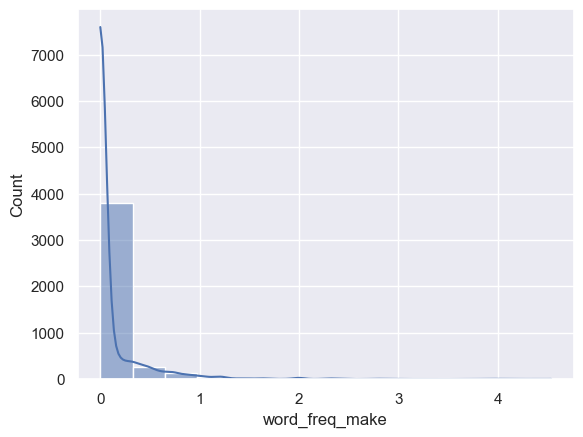

In [40]:
sns.histplot(df['word_freq_make'], kde=True)

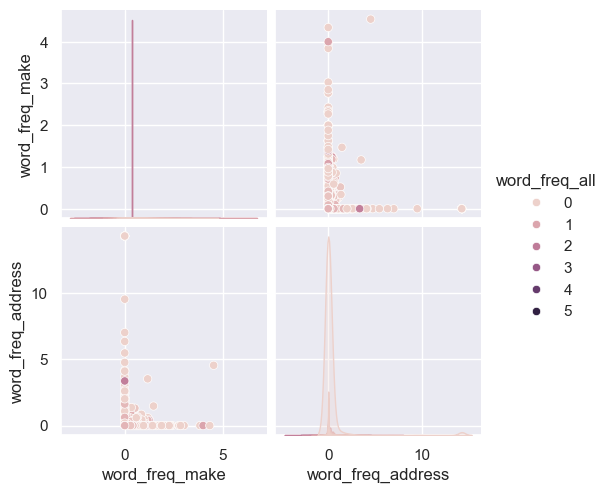

In [41]:
sns.pairplot(df[['word_freq_make', 'word_freq_address', 'word_freq_all']], hue='word_freq_all')
plt.show()

In [42]:
sns.pairplot(df[['word_freq_make', 'word_freq_all', 'is_spam']], hue='word_freq_all')
plt.show()

KeyError: "['is_spam'] not in index"

In [ ]:
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt
sns.set() 

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("spambase.csv")

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['word_freq_make'], kde=True)
plt.title('Distribution of Word Frequency: Make')
plt.xlabel('Word Frequency (Make)')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('spambase.csv')

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=word_freq_make, palette='word_freq_make')
plt.title('word_freq_make')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
print(len(X))
print(len(X_train))
print(len(X_test))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.95)
print(len(X))
print(len(X_train))
print(len(X_test))

The Curse of Dimensionality is a phenomenon in data science where the difficulty of a problem increases exponentially with the number of dimensions (or features) in the data. As the number of dimensions grows, the data becomes increasingly scattered, making it harder to identify meaningful patterns and relationships. The concept is explained as a needle in a haystack. 

In the Spambase dataset, while not very high-dimensional, can still be susceptible to the curse of dimensionality, especially if working with complex models or techniques.
Traditional distance metrics, like Euclidean distance, become less meaningful in high-dimensional spaces and Clustering algorithms may struggle to identify meaningful groups in sparse data.

To address the challenges of the Curse of Dimensionality, we can try Feature Selection. Filter Methods by selecting features based on statistical measures like correlation or mutual information.

Wrapper Methods, by using a machine learning model to evaluate feature subsets. And Embedded Methods by selecting features during the model training process, like L1 regularization.

Dimensionality Reduction:

Principal Component Analysis (PCA): Reduce the dimensionality of the data while preserving most of the variance.
We try Dimensionality Reduction by using Principal Component Analysis (PCA)

To reduce the dimensionality (size) of our dataset while preserving most of its information, we employ Principal Component Analysis (PCA) by standardizing the data to ensure equal weighting of features.
PCA is applied to the standardized data to identify the principal components, which are linear combinations of the original features.
For the Variance we calculate the cumulative explained variance ratio for each principal component to assess the amount of variance captured by each.
For the Component Selection: the minimum number of principal components required to explain 99.5% of the total variance is determined.
PCA is applied again for Dimensionality Reduction this time retaining only the selected number of principal components to reduce the dimensionality of the data.

By reducing the number of dimensions, we simplify subsequent analyses and modeling tasks without significant loss of information. The 99.5% variance threshold ensures that most of the original data's variability is preserved.

References:
Course notes on https://moodle.cct.ie, Faculty of Computing/Level 8 HDIP Programmes/2024 - HDip in Data Analytics for Business (HCI) - Sept Semester 1/ DataPrep_HDipData_Sept24_HCI Lecturer David McQuaid Python for Data Analysis. Data Wrangling with Pandas, NumPy, and IPython (2017, O’Reilly)
Course notes on https://moodle.cct.ie, Faculty of Computing/Level 8 HDIP Programmes/2024 - HDip in Data Analytics for Business (HCI) - Sept Semester 1/ DataPrep_HDipData_Sept24_HCI Lecturer David McQuaid Data Management   
Course notes on https://moodle.cct.ie, Faculty of Computing/Level 8 HDIP Programmes/2024 - HDip in Data Analytics for Business (HCI) - Sept Semester 1/ DataPrep_HDipData_Sept24_HCI Lecturer David McQuaid Jupyter Notebook Tutorial
Course notes on https://moodle.cct.ie, Faculty of Computing/Level 8 HDIP Programmes/2024 - HDip in Data Analytics for Business (HCI) - Sept Semester 1/ DataPrep_HDipData_Sept24_HCI Lecturer David McQuaid How to Deal with Missing Data in Python
Course notes on https://moodle.cct.ie, Faculty of Computing/Level 8 HDIP Programmes/2024 - HDip in Data Analytics for Business (HCI) - Sept Semester 1/ DataPrep_HDipData_Sept24_HCI Lecturer David McQuaid Data Cleaning
Course notes on https://moodle.cct.ie, Faculty of Computing/Level 8 HDIP Programmes/2024 - HDip in Data Analytics for Business (HCI) - Sept Semester 1/ DataPrep_HDipData_Sept24_HCI Lecturer David McQuaid The Curse of Dimensionality
Course notes on https://moodle.cct.ie, Faculty of Computing/Level 8 HDIP Programmes/2024 - HDip in Data Analytics for Business (HCI) - Sept Semester 1/ DataPrep_HDipData_Sept24_HCI Lecturer David McQuaid PCA
SATSifaction. (2019, June 26). Introduction to Machine Learning with Python (Part 1) [Video file].
https://www.youtube.com/watch?v=78ut-S-QOEQ&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4                                                                                                                                                                                                                YouTube. https://www.youtube.com/watch?v=_7BYZ5X57sU                                                                                                                                                                                                                